> # Rappels des chapitres "Primitives" et "Intégration"

#### *Remarque* : Ce notebook propose à la fois des rappels et des exercices. On prendra le temps d'y réfléchir, le crayon à la main, sur une feuille de brouillon avant de proposer une réponse.   
Une correction des exercices est proposée en fin de document mais elle ne doit être utilisée qu'en dernier recours, si les calculs n'aboutissent pas...

## 1. Rappels.

**Définition 1 :** Soit $f$ une fonction définie sur un intervalle $I$.  
On appelle primitive de $f$ sur $I$ toute fonction $F$ définie sur $I$ telle que $F$ soit dérivable sur $I$ avec $F'=f$.

** Théorème 1 :** Toute fonction continue sur $I$ admet une primitive sur cet intervalle [*Admis*].

** Proposition 1 :** Soit $f$ une fonction continue sur $I$ (éventuellement par morceaux) et $F$ une primitive de $f$ sur $I$.  
Alors l'ensemble des primitives de $f$ sur $I$ est : $\{F+c,c\in\mathbb{R}\}$.

**Proposition 2 :** Soit $f$ une fonction continue sur $I$ et $F$ une primitive de $f$ sur $I$.  
Alors $F$ est une fonction de classe $\mathcal{C}^1$ sur $\mathbb{R}$.  
Par ailleurs, si $f$ est positive sur $I$ alors $F$ est croissante sur $I$.

**Définition 2 :** Soit $f$ une fonction continue sur un segment $[a,b]$.  
On appelle *intégrale* de $f$ de $a$ à $b$ le **réel** : $$\displaystyle\int_a^bf(t)dt=F(b)-F(a)$$
où $F$ est une primitive de $f$.

**Théorème 2 :** Soit $f$ une fonction continue sur un intervalle $I$. Pour tout $a\in I$, la fonction $F$ définie sur $I$ par : $$F(x)=\displaystyle\int_a^xf(t)dt$$
est l'unique **primitive** de $f$ qui s'annule en $a$.

**Définition 3 (Intégrale d'une fonction continue par morceaux) :** Soient $a<b$ deux réels et $f$ une fonction continue par morceaux sur $[a,b]$.  
Soit une subdivision $\mathcal{S}=\{x_0,x_1,\cdots,x_n\}$ telle que $a=x_0<x_1<\cdots<x_{n-1}<x_n=b$ avec $f$ continue sur $]x_k,x_{k+1}[$, admettant une limite finie à gauche et à droite en $x_k$ et une limite finie a droite en $a$, une limite finie à gauche en $b$.  
Alors :  
$$\displaystyle\int_a^bf(t)dt=\displaystyle\sum_{k=0}^{n-1}\displaystyle\int_{x_k}^{x_{k+1}}f(t)dt$$

**Définition 4 (le cas des subdivisions régulières) :** Soit $f$ une fonction continue sur un intervalle $[a,b]$.  
On appellera **subdivision régulière** de l'intervalle $[a,b]$ la suite $\sigma=(c_k)_{k\geq 0}$ définie par $c_k=a+k\cfrac{b-a}{n}$ où $h=\cfrac{b-a}{n}$ désigne son **pas**. On note que $c_0=a$, $c_n=b$.  
Alors, d'après la relation de Chasles : $$I = \displaystyle\int_a^bf(t)dt=\displaystyle\sum_{k=0}^{n-1}\displaystyle\int_{c_k}^{c_{k+1}}f(t)dt$$

## 2. Approximation numérique.

### a) Le contexte théorique

La méthode au programme utilise les *Sommes de Riemann* et est aussi appelée *Méthode des rectangles*. 

**Le cas de l'intervalle $I=[0,1]$ : ** 
On considère la subdivision régulière $\sigma=(c_k)_{k\geq 0}$ définie par $c_k=0+k\cfrac{1-0}{n}=\cfrac{k}{n}$ où $h=\cfrac{1}{n}$ désigne son **pas**.  
Alors, en approximant $f$, sur l'intervalle $[c_k,c_{k+1}]$ par la fonction constante égale à $f(c_{k})$, on obtient d'après la définition 4 :   

$$\displaystyle\int_0^1f(t)dt = \underset{n\rightarrow\infty}{lim}\cfrac{1}{n}\displaystyle\sum_{k=0}^{n-1}f(c_k) = \underset{n\rightarrow\infty}{lim}\cfrac{1}{n}\displaystyle\sum_{k=0}^{n-1}f\left(\cfrac{k}{n}\right)=\underset{n\rightarrow\infty}{lim}\cfrac{1}{n}\displaystyle\sum_{k=1}^{n}f\left(\cfrac{k}{n}\right)$$  

**Le cas de l'intervalle $I=[a,b]$ : ** 
On considère la subdivision régulière $\sigma=(c_k)_{k\geq 0}$ définie par $c_k=a+k\cfrac{b-a}{n}$ où $h=\cfrac{b-a}{n}$ désigne son **pas**.  
Alors, en approximant $f$, sur l'intervalle $[c_k,c_{k+1}]$ par la fonction constante égale à $f(c_{k})$, on obtient d'après la définition 4 :   

$$\displaystyle\int_a^bf(t)dt = \underset{n\rightarrow\infty}{lim}\cfrac{b-a}{n}\displaystyle\sum_{k=0}^{n-1}f(c_k) = \underset{n\rightarrow\infty}{lim}\cfrac{b-a}{n}\displaystyle\sum_{k=0}^{n-1}f\left(a+k\cfrac{b-a}{n}\right)=\underset{n\rightarrow\infty}{lim}\cfrac{b-a}{n}\displaystyle\sum_{k=1}^{n}f\left(a+k\cfrac{b-a}{n}\right)$$  

### b) La formule à retenir :
Pour obtenir une approximation numérique de l'intégrale entre $a$ et $b$ d'une fonction $f$ continue sur $I=[a,b]$, on prendra $n$ suffisamment grand pour pouvoir écrire : 
$$I\approx\cfrac{b-a}{n}\displaystyle\sum_{k=0}^{n-1}f(c_k)$$
où $$c_k=a+k\cfrac{b-a}{n}\quad 0\leq k\leq n$$

### c) En pratique :

On commence par importer les bibliothèques utiles :

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

On traduit alors algorithmiquement la formule précédente en quelques lignes : 
- - -
    h = (b-a)/n  # Création du pas de la subdivision
    subdivision = np.arange(a,b,h) # On créé la subdivision = {a,a+h,a+2h,...,a+(n-1)h}
    S = f(subdivision) # on calcule les f(ck) pour tout ck dans la subdivision
    I = h*np.sum(S) # calcul de la valeur approchée de l'intégrale  
    
Ce qui donne :  

In [4]:
def IntMethRectangle(f,a,b,n):
    # retourne une valeur approchée de l'intégrale de f entre a et b avec h = (b-a)/n
    h=(b-a)/n
    subd = np.arange(a,b,h)  # réels de a à b (exclus) séparés par un pas de 'h'
    S =f(subd)  # valeurs de f en chaque point de la subdivision
    plt.bar(subd,S,h,alpha=0.4) # tracé des rectangles dont l'aire est utilisée pour approcher l'intégrale
    X = np.linspace(a,b,100)
    plt.plot(X,f(X),'r-') # tracé de la courbe de f sur [a,b]
    return h*np.sum(S)

Ensuite, il n'y a plus qu'à essayer avec différentes fonctions $f$ continues sur $[a,b]$ et différentes valeurs de $n$ :

une valeur approchée de I vaut :  3.24321748265


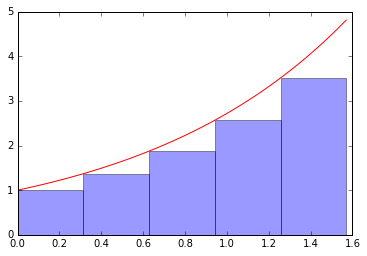

In [6]:
f = lambda x:np.exp(x)
I = IntMethRectangle(f,0,np.pi/2,5)
print('une valeur approchée de I vaut : ',I)

** A faire : ** Modifier la cellule de code précédente en modifiant les valeurs de $n$ et vérifier manuellement que la limite vaut $$I=\displaystyle\int_0^{\pi}\sin(t)dt=\left[-\cos(t)\right]_0^{\pi}=2$$ 
Essayez aussi avec d'autres fonctions de votre choix sur des intervalles variés !

**REMARQUE :** Python dispose d'une bibliothèque qui dispose de fonctions permettant d'obtenir directement une approximation d'une intégrale donnée.  
Il s'agit du module `integrate` de la bibliothèque `scipy`.  

Pour l'utiliser, on pourra écrire :  

In [7]:
from scipy import integrate

In [ ]:
help(integrate.quad)

In [ ]:
R = integrate.quad(f,0,np.pi/2) # approximation numérique de l'intégrale de f sur [0,pi/2]
print(R) # R[0] donne la valeur approchée de I et R[1] donne l'erreur commise

## 3. Exercices.

Dans chacun des quatre exercices à suivre, déterminer une primitive $F$ des fonctions $f$ suivantes et valider votre réponse en calculant l'intégrale sur l'intervalle $I=[a,b]$ de trois manière distinctes :  

a) en calculant $F(b)-F(a)$  
b) en utilisant la fonction `IntMethRectangle(f,a,b,n)`  
c) en utilisant la méthode `quad()` de la bibliothèque `scipy.integrate`.  

**Remarque :** A titre d'exercice, on pourra faire l'étude de ces fonctions (ensemble de définition, continuité et dérivabilité, parité, tableau de variation et allure) et on s'entraînera à utiliser Geogebra pour obtenir rapidement une représentation graphique.

### Exercice 1 : Les primitives usuelles.

1. $f(x)=3x-1$, $I=[0,2]$  
2. $f(x)=\cfrac{3}{2x}$, $I_1=[1,2]$ et $I_2=[-2,-1]$
3. $f(x)=\cfrac{\cos(2x)}{3}$, $I=[-\pi/4,\pi/4]$
4. $f(x)=(2x+1)(x^2+x+1)^2$, $I=[-1,1/2]$  
5. $f(x)=\cfrac{x^2-1}{\sqrt{x^3-3x+1}}$, $I=[2,6]$  
6. $f(x)=\cfrac{x^5}{1+x^6}$, $I_1=[-3,3]$, $I_2=[0,4]$  
7. $f(x)=\cfrac{1}{x\ln(|x|)}$, $I=[-4,-2]$  
8. $f(x)=\cfrac{\sqrt{1+\ln(x)}}{x}$, $I=[1/e,3]$  
9. $f(x)=\cfrac{\cos(x)}{\sin^2(x)}$, $I=[1/2,2]$  
10. $f(x)=\cfrac{\cos(x)}{4+\sin^2(x)}$, $I=[-1,3]$  
11. $f(x)=2^{3x+4}$, $I=[-3,0]$ 

In [ ]:
f = lambda x:...  # à compléter (par exemple pour 1. : f = lambda x:3*x-1)
F = lambda x:... # a compléter (pour 1. : F = lambda x:(3/2)*x**2-x)
a,b = ...  # à compléter (pour 1. a,b = 0,2)
I1 = F(b)-F(a)
I2 = IntMethRectangle(f,a,b,1e3)
R = integrate.quad(f,a,b)
I3 = R[0]
print(I1,I2,I3)

### Exercices 2 : Les formes rationnelles de la forme $\cfrac{\alpha x+\beta}{ax^2+bx+c}$

12. $f(x)=\cfrac{1}{x^2-1}$, $I_1=[3/2,4]$, $I_2=[-1/2,1/2]$. *Indication :* Trouver $a,b\in\mathbb{R}$ tels que : $f(x)=\cfrac{a}{x-1}+\cfrac{b}{x+1}$
13. $f(x)=\cfrac{x+3}{x^2-1}$, $I=[3/2,4]$  
14. $f(x)=\cfrac{x+2}{x^2+2x+1}$, $I=[0,5]$  
15. $f(x)=\cfrac{1}{x^2+x+1}$, $I=[-2,2]$ (*remarque :* penser à utiliser la forme canonique pour faire apparaître un $\arctan()$).  
16. $f(x)=\cfrac{2x+2}{x^2+x+1}$, $I=[-1,3]$

In [ ]:
f = lambda x:...  # à compléter (par exemple pour 1. : f = lambda x:1/(x**2-1))
F = lambda x:... # a compléter 
a,b = ...  # à compléter
I1 = F(b)-F(a)
I2 = IntMethRectangle(f,a,b,1e3)
R = integrate.quad(f,a,b)
I3 = R[0]
print(I1,I2,I3)

### Exercice 3 : Les intégrations par parties.

1. $f(x)=xe^x$, $I=[-1,1]$  

2. $f(x)=\cfrac{\arctan(x)}{x^2}$, $I=[1/2,3]$

3. $f(x)=\ln(x+\sqrt{x^2-1})$, $I=[1,5]$  

4. $f(x)=\arctan(\sqrt{x})$, $I=[0,2]$

In [ ]:
f = lambda x:...  # à compléter (par exemple pour 1. : f = lambda x:x*np.exp(x))
F = lambda x:... # a compléter 
a,b = ...  # à compléter
I1 = F(b)-F(a)
I2 = IntMethRectangle(f,a,b,1e3)
R = integrate.quad(f,a,b)
I3 = R[0]
print(I1,I2,I3)

### Exercice 4 : Les changements de variables.

1. $F(x)=\displaystyle\int_0^x\cfrac{t}{1+t^4}dt$ ; fonction changement de variable $s=u(t)=t^2$.  
2. $F(x)=\displaystyle\int_0^x\cfrac{dt}{\cos^4(t)}$, $\forall x\in ]-\cfrac{\pi}{2},\cfrac{\pi}{2}[$ ; fonction changement de variable $s=u(t)=\tan(t)$.  
3. $F(x)=\displaystyle\int_1^x\cfrac{dt}{t\sqrt{1+t}}$, $\forall x\in \mathbb{R}_+^*$ ; fonction changement de variable $s=u(t)=\sqrt{1+t}$  
4.  $F(x)=\displaystyle\int_0^x\cfrac{\sqrt{t}}{(t+1)^2}dt$, $\forall x\in \mathbb{R}_+^*$ ; fonction changement de variable $s=u(t)=\sqrt{t}$ 

In [ ]:
f = lambda x:...  # à compléter (par exemple pour 1. : f = lambda x:x*np.exp(x))
F = lambda x:... # a compléter 
a,b = ...  # à compléter
I1 = F(b)-F(a)
I2 = IntMethRectangle(f,a,b,1e3)
R = integrate.quad(f,a,b)
I3 = R[0]
print(I1,I2,I3)

## 4. Solutions des exercices.

### Correction exercice 1:

> 1. $F(x)=3x^2/2-x$
> 2. $F(x)= \cfrac{3}{2}\ln(|x|)$
> 3. $F(x)= \cfrac{\sin(2x)}{6}$
> 4. $F(x)=\cfrac{(x^2+x+1)^3}{3}$
> 5. $F(x)=\cfrac{2}{3}\sqrt{x^3-3x+1}$
> 6. $F(x)=\cfrac{1}{6}\ln(1+x^6)$
> 7. $F(x)=\ln|ln|x||$
> 8. $F(x)=\cfrac{2}{3}\sqrt{(1+\ln(x))^3}$
> 9. $F(x)=-\cfrac{1}{\sin(x)}$.
> 10. $F(x)=\cfrac{1}{2}\arctan\left(\cfrac{\sin(x)}{2}\right)$  
> 11. $F(x)=\cfrac{1}{3\ln(2)}2^{3x+1}$.  

### Correction exercice 2 :

> 12. $F(x)=\cfrac{1}{2}\ln\left(\left|\cfrac{x-1}{x+1}\right| \right)$  
> 13. $F(x)=\cfrac{1}{2}\ln|x^2-1|+\cfrac{3}{2}\ln\left(\left|\cfrac{x-1}{x+1}\right| \right)=\ln\left(\left|\cfrac{(x-1)^2}{x+1}\right| \right)$.  
    >> en effet : $f(x)=\cfrac{1}{2}\cfrac{2x+6}{x^2-1}=\cfrac{1}{2}\cfrac{2x}{x^2-1}+\cfrac{6}{2}\cfrac{1}{x^2-1}=\cfrac{1}{2}\cfrac{2x}{x^2-1}+3\cfrac{1}{x^2-1}$ ;  
    On utilise alors 12.  
> 14. $F(x)=\ln|x+1|-\cfrac{1}{x+1}$.
    >> en effet : $f(x)=\cfrac{1}{2}\cfrac{2x+2}{x^2+2x+1}+\cfrac{1}{(x+1)^2}$
> 15. $F(x)=\cfrac{2}{\sqrt{3}}\arctan\left(\cfrac{2x+1}{\sqrt{3}}\right)$
    >> en effet : $f(x)=\cfrac{1}{(x+1/2)^2+3/4}=\cfrac{4}{3}\cfrac{1}{\left(\dfrac{2}{\sqrt{3}}(x+\dfrac{1}{2})\right)^2+1}$  
> 16. $F(x)=\ln(x^2+x+1)-\cfrac{2}{\sqrt{3}}\arctan\left(\cfrac{2x+1}{\sqrt{3}} \right)$

### Correction exercice 3 :

1. $F(x)=xe^x-e^x$ avec $u(x)=x$ et $v'(x)=e^x$.  
2. $F(x) = -\cfrac{1}{x}\arctan(x)+\ln|x|-\cfrac{1}{2}\ln(1+x^2)$ avec $u(x)=\arctan(x)$ et $v(x)=\cfrac{1}{x^2}$  
    > en effet : $\cfrac{1}{x(1+x^2)}=\cfrac{1+x^2-x^2}{x(1+x^2)}=\cfrac{1}{x}-\cfrac{x}{1+x^2}$  
3. $F(x)=x\ln\left(x+\sqrt{x^2-1}\right)-\sqrt{x^2-1}$ avec $u(x)=\ln\left(x+\sqrt{x^2-1}\right)$ et $v'(x)=1$  
4. $F(x)=(x+1)\arctan(\sqrt{x})-\sqrt{x}$ avec $u(x)=\arctan(\sqrt{x})$ et $v'(x)=1$  
    > en effet : on notera que si $v'(x)=1$ alors $v(x)=x+c$ où $c\in\mathbb{R}$... à vous de choisir correctement la valeur de $c$ !

### Correction exercice 4 :

1. $F(x)=\displaystyle\int_0^x\cfrac{t}{1+t^4}dt$ avec $s=u(t)=t^2$ et donc $ds=2tdt$. Soit :
    > $F(x)=\displaystyle\int_0^{x^2}\cfrac{ds/2}{1+s^2}=\cfrac{1}{2}\displaystyle\int_0^{x^2}\cfrac{ds}{1+s^2}=\cfrac{\arctan(x^2)}{2}$
2. $F(x)=\displaystyle\int_0^{u(x)}(1+s^2)ds=\tan(x)+\cfrac{\tan^3(x)}{3}$ avec $u\in\mathcal{C}^1([0,x])$, $\forall x\in]-\pi/2,\pi/2[$.  
3. $F(x)=\displaystyle\int_{\sqrt{2}}^{u(x)}\cfrac{2ds}{s^2-1}=\displaystyle\int_{\sqrt{2}}^{u(x)}\left(\cfrac{1}{s-1}-\cfrac{1}{s+1}\right)ds=\ln\left(\left|\cfrac{\sqrt{1+x}-1}{\sqrt{1+x}+1}\right| \right)-C$ où $C=\ln\left(\left|\cfrac{\sqrt{2}-1}{\sqrt{2}+1}\right| \right)$, $\forall x\in \mathbb{R}_+^*$  
4.  $F(x)=\displaystyle\int_0^{u(x)}\cfrac{2s^2}{(s^2+1)^2}ds=\displaystyle\int_0^{u(x)}\cfrac{2s}{(s^2+1)^2}sds=-\cfrac{\sqrt{x}}{x+1}+\arctan(\sqrt{x})$, $\forall x\in \mathbb{R}_+^*$ [par Int. par Parties]